# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing Required Libraries

In [127]:
!pip install -r requirements.txt -q
# Locking down version numbers to avoid future bugs
#Successfully installed contourpy-1.3.2 cycler-0.12.1 fonttools-4.59.0 kiwisolver-1.4.8 matplotlib-3.10.3 numpy-2.3.2 pandas-2.3.1 pillow-11.3.0 pyparsing-3.2.3 pytz-2025.2 seaborn-0.13.2 tzdata-2025.2

#

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [128]:
# import libraries for data manipulation
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [129]:
# Write your code here to read the data
df_original = pd.read_csv('data/foodhub_order.csv')
df = df_original.copy()

In [130]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]



In [131]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

The foodhub_order.csv file has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]
* order_id, customer_id, and food_preparation_time are all integer values.
* restaurant_name, cuisine_type, day_of_the_week, and rating are all object types.
* cost_of_the_order is float type.

In [132]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset contains **5 numerical fields** and **4 categorical fields**.


**Integer Fields:**
- `order_id`
- `customer_id`
- `food_preparation_time`
- `delivery_time`

**Float Field:**
- `cost_of_the_order`

**Object Types:**
- `restaurant_name`
- `cuisine_type`
- `day_of_the_week`
- `rating`

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [133]:
# Write the code here
# First, convert the 'rating' field to float (handles non-numeric values safely)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Compute the mean rating (excluding NaN)
mean_rating = df['rating'].mean().round(0)

# Fill missing values with the mean
df_clean = df.copy()
df_clean['rating'] = df_clean['rating'].fillna(mean_rating)
df_clean['rating'] = df_clean['rating'].astype(int)
df_clean.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [134]:
df_rated = df_clean[df_original.rating != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype(int)
df_rated.head()
df_original.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:
**Data Cleaning Summary**
* The only column with missing data is the rating column. I have replaced this value with the average rating of 4 and saved it to `df_clean`.
* Because there is so much missing data I also created a new dataframe called `df_rated` with all the un-rated orders removed.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [135]:
# Write your code here
df_clean.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.210748,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.603845,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:
**Food Prep Stats**

- average food prep time: 27 minutes.
- minimum food prep time: 20 minutes.
- maximum food prep time: 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [136]:
# Write the code here
df_not_given = df_original['rating'] == 'Not given'
print(df_original[df_not_given]['rating'].count())

736


#### Observations:

There were 736 records in this data set with missing ratings.

### Exploratory Data Analysis (EDA)

In [137]:
df_clean.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.210748,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.603845,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [138]:
# Check number of unique values for each column to decide what data analysis methods would be best.
# Write the code here

for col in df_clean.columns:
    print(col,":",df_clean[col].nunique())

order_id : 1898
customer_id : 1200
restaurant_name : 178
cuisine_type : 14
cost_of_the_order : 312
day_of_the_week : 2
rating : 3
food_preparation_time : 16
delivery_time : 19


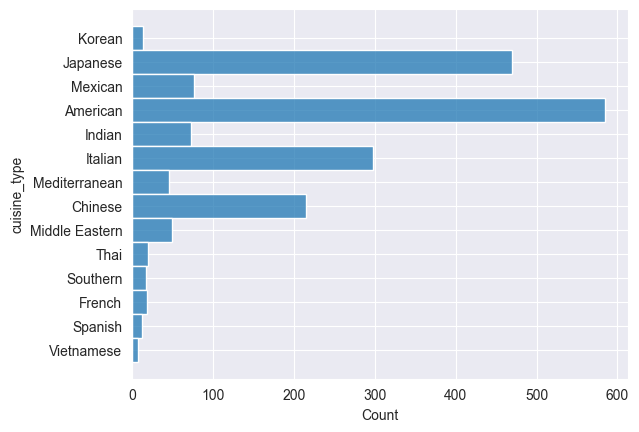

In [139]:
# The cuisines with the restaurants with the most data points in this dataset have cuisine_type of American, Japanese, and Italian
sns.histplot(df_clean, y='cuisine_type');

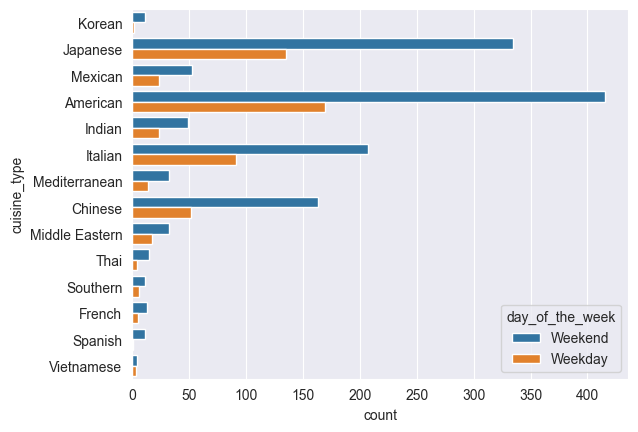

In [140]:
# People go out ot eat on the weekends more than the weeknights.
sns.countplot(df_clean, y="cuisine_type", hue='day_of_the_week');

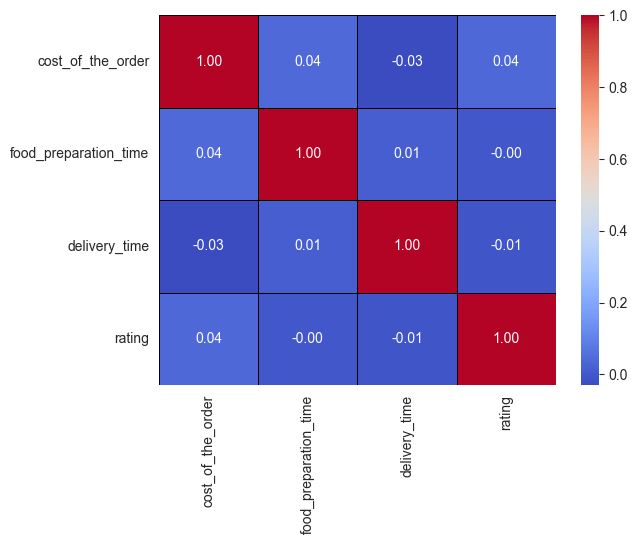

In [141]:
# None of the numerical correlations on the heatmaps are super helpful
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
sns.heatmap(df_clean[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', annot_kws={'size': 10});

#### Observations:
* The cuisines with the restaurants with the most data points in this dataset have cuisine_type of American, Japanese, and Italian
* People go out ot eat on the weekends more than the weeknights.
* None of the numerical correlations on the heatmaps are super helpful.

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

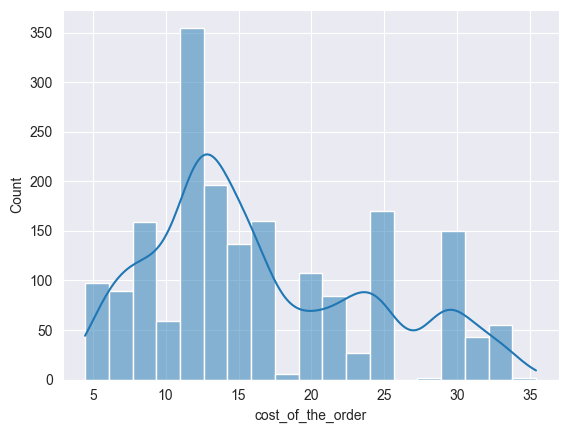

In [142]:
# The unrated data for the order cost graph is more messy most likely do to averaging of values.
sns.histplot(df_clean, x='cost_of_the_order', kde=True);

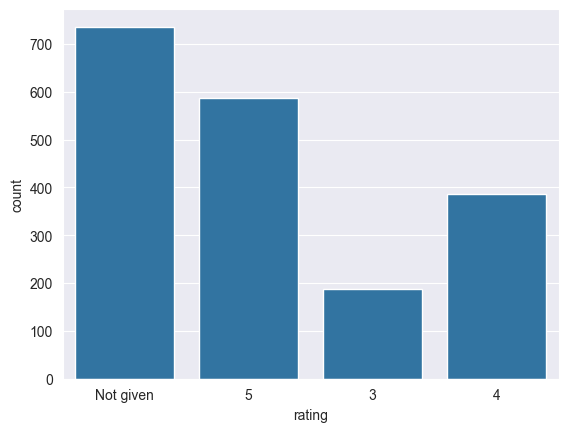

In [143]:
# There are more 5-star ratings than 4-star ratings. A lot of the ratings are missing so there isn't much we can do with this data.
sns.countplot(df_original, x='rating');


<Axes: xlabel='food_preparation_time', ylabel='Count'>

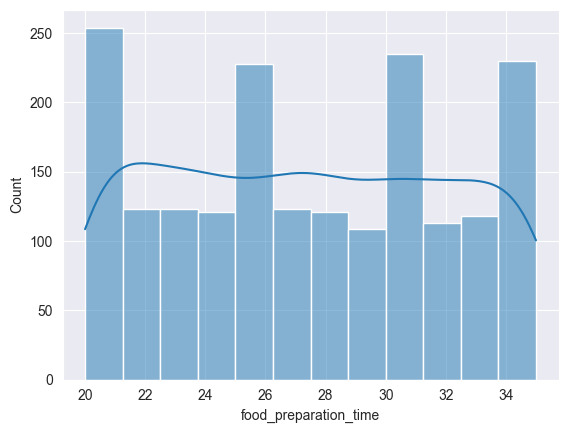

In [144]:
# Food prep time has a fairly even distribution
sns.histplot(df_clean, x='food_preparation_time', kde=True)


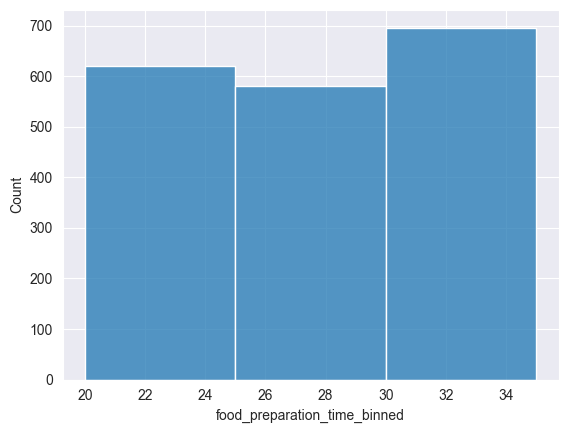

In [145]:
df_binned = df_clean.copy()
df_binned['food_preparation_time_binned'] = df_binned['food_preparation_time'].apply(lambda x: x // 5 * 5)
df_binned.drop(columns=['food_preparation_time'], inplace=True)
sns.histplot(df_binned, x='food_preparation_time_binned', binwidth=5);

<Axes: xlabel='delivery_time', ylabel='Count'>

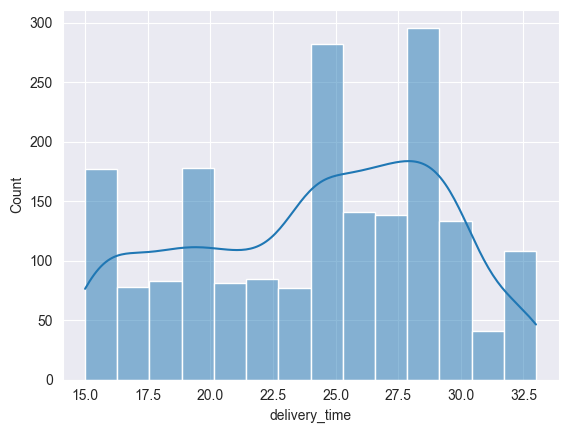

In [146]:
# Food prep time has a fairly even distribution
sns.histplot(df_clean, x='delivery_time', kde=True)

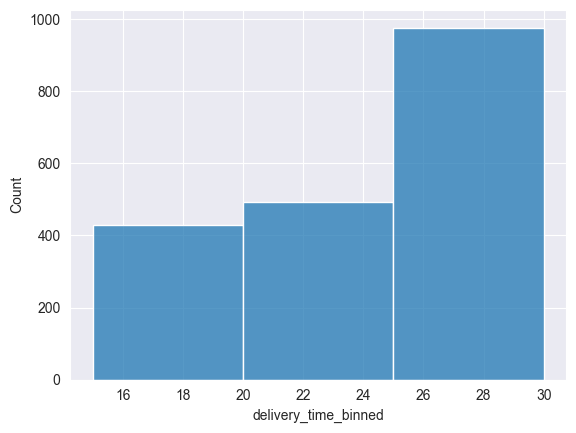

In [147]:
df_binned['delivery_time_binned'] = df_clean['delivery_time'].apply(lambda x: x // 5 * 5)
sns.histplot(df_binned, x='delivery_time_binned', binwidth=5);

#### Observations:
* It looks like the cost of the order plot follows a bimodal distribution.
* The kde plot for food_preparation_time and delivery_time both have spikes at values which are divisible by 5 which is likely to be a product of how the data is gathered.
* I am considering making a copy of the data frame with all the values rounded to the original values mod 5

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [148]:
# Write the code here
df_clean.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The top 5 restaurants are
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [149]:
# Write the code here
print(df_clean[df_clean['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1))

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
The most popular cuisine on the weekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [150]:
# Write the code here
df_clean[df_clean['cost_of_the_order'] > 20].shape[0] / df_clean.shape[0]

0.2924130663856691

#### Observations:
%29 or orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [151]:
# Write the code here
print(df_clean['delivery_time'].mean().round(2))

24.16


#### Observations:
The mean delivery time is 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [152]:
# Write the code here
df_top_customers = df_clean.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)
print(df_top_customers)



customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
The top 3 customer_id's by ratings are 13, 10, and 9.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cost of Order by count


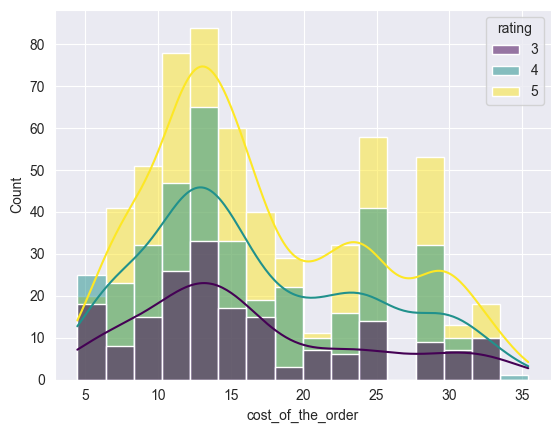

In [153]:
# It looks like the cost of the order plot follows a bimodal distribution with a stronger bi-modality for highly rated restaurants.
sns.histplot(df_rated, x='cost_of_the_order', kde=True, hue="rating", palette="viridis");


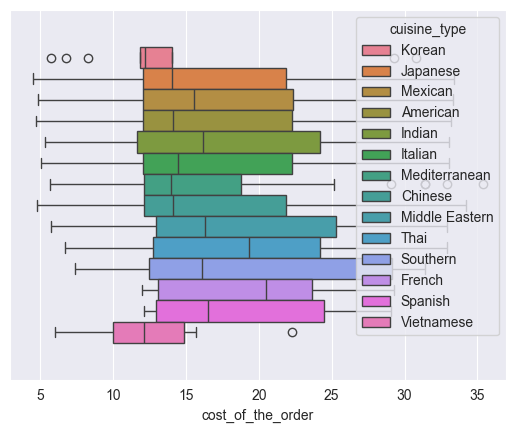

In [154]:

# Cuisine Type by cost
sns.boxplot(df_clean, hue='cuisine_type', x='cost_of_the_order');

#### Cuisine Type by cost

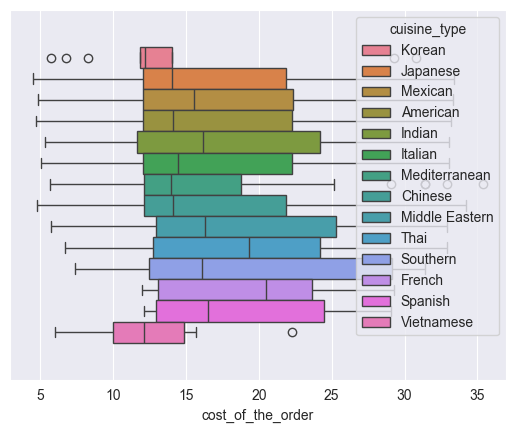

In [155]:

# Cuisine Type by cost
sns.boxplot(df_clean, hue='cuisine_type', x='cost_of_the_order');

#### Cuisine Type By Day of the Week


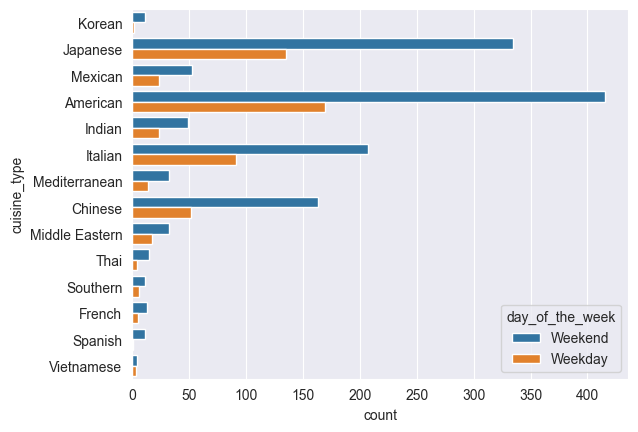

In [156]:
# People go out ot eat on the weekends more than the weeknights.
sns.countplot(df_clean, y="cuisine_type", hue='day_of_the_week');


#### Top Ratings by Cuisine

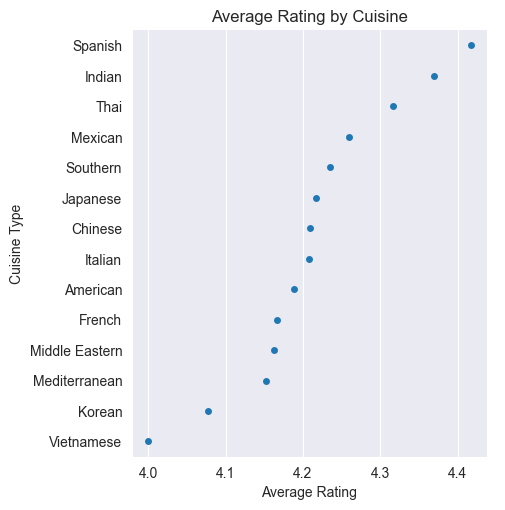

In [157]:
# The cuisines with the top ratings are Spanish, Indian, Thai, Mexican, Southern
df_mean_rating_by_cuisine = df_clean.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
df_mean_rating_by_cuisine = pd.DataFrame(df_mean_rating_by_cuisine)

sns.catplot(data=df_mean_rating_by_cuisine, y=df_mean_rating_by_cuisine.index, x='rating')
df_mean_rating_by_cuisine.head()
plt.title('Average Rating by Cuisine')
plt.ylabel('Cuisine Type')
plt.xlabel('Average Rating');


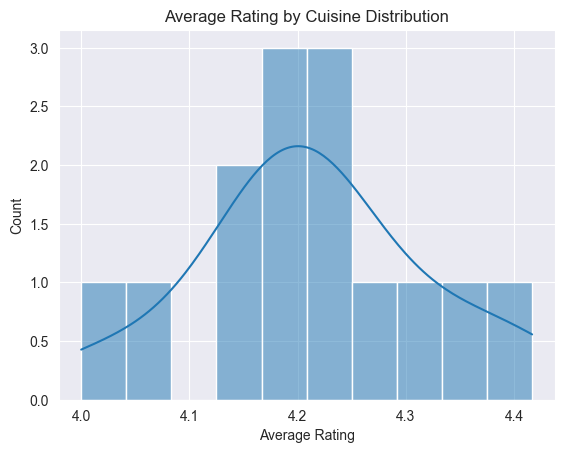

In [158]:
# The mean rating  by cuisine chart has a distribution with a range of 4.0 to 4.4, and follows a normal distribution.
sns.histplot(df_mean_rating_by_cuisine, kde=True, x='rating', bins=10, label='Average Rating by Cuisine')
plt.title('Average Rating by Cuisine Distribution')
plt.xlabel('Average Rating');


#### Top Ratings by Restaurant

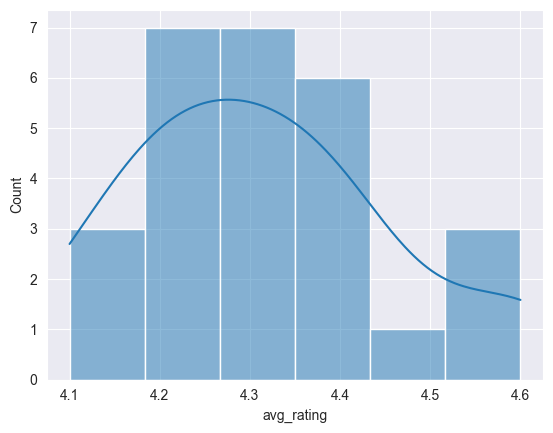

In [159]:
df_stats_by_restaurant = (
    df_rated.groupby('restaurant_name')
    .agg(
        avg_rating=('rating', 'mean'),
        rating_count=('rating', 'count'),
        avg_cost_of_the_order=('cost_of_the_order', 'mean'),
        avg_food_preparation_time=('food_preparation_time', 'mean')
    ).query('rating_count > 10')
    .sort_values(by='avg_rating', ascending=False)
)
df_stats_by_restaurant.drop(columns=['rating_count'], inplace=True)
df_stats_by_restaurant['avg_rating'] = df_stats_by_restaurant['avg_rating'].round(1)
df_stats_by_restaurant['avg_cost_of_the_order'] = df_stats_by_restaurant['avg_cost_of_the_order'].round(2)
df_stats_by_restaurant['avg_food_preparation_time'] = df_stats_by_restaurant['avg_food_preparation_time'].round(2)

sns.histplot(df_stats_by_restaurant, x='avg_rating',  kde=True);
# The mean rating by restaurant chart has a distribution with a range of 4.1 to 4.6, and follows a normal distribution.

#### Pair Plot of Ratings by Restaurant

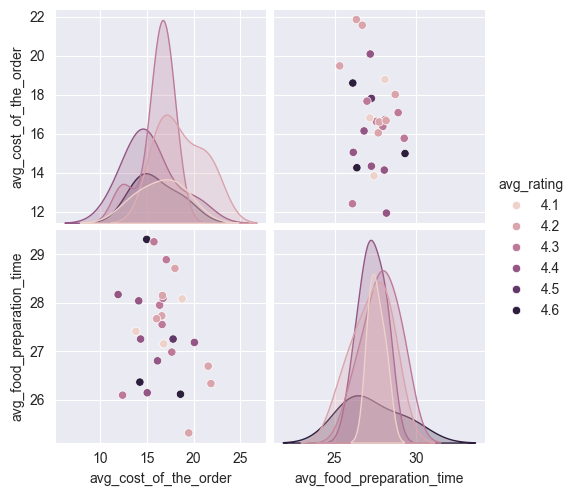

In [160]:
# Restaurants with too few ratings don't have enough data for us to make reasonable predictions about them.
# Restaurants with fast food prep time are more likely to have high ratings.

sns.pairplot(data=df_stats_by_restaurant, hue='avg_rating');

#### Strength of Correlations

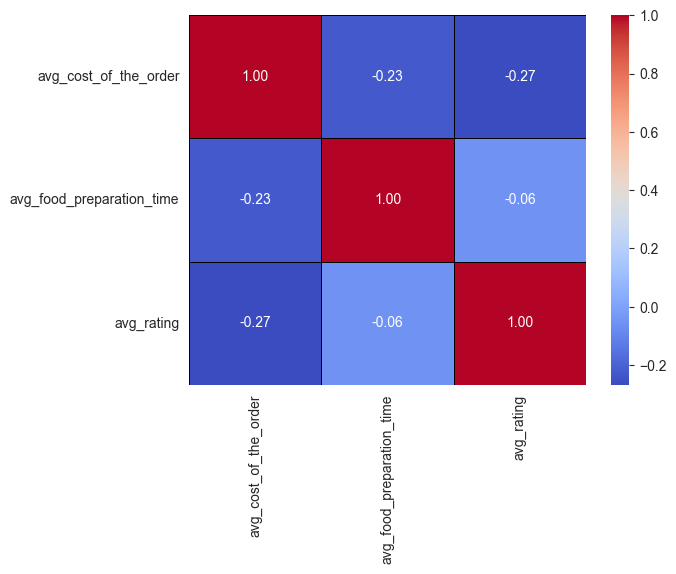

In [161]:
numerical_columns = ['avg_cost_of_the_order', 'avg_food_preparation_time', 'avg_rating']
sns.heatmap(df_stats_by_restaurant[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', annot_kws={'size': 10});

#### Top Restaurants by Cost

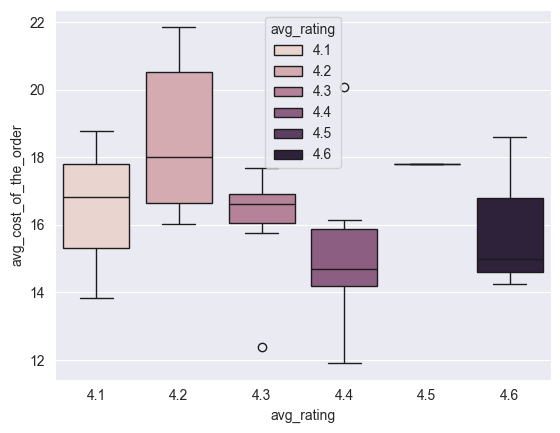

In [162]:
# Restaurants with low costs are more likely to have high ratings.
sns.boxplot(data=df_stats_by_restaurant, x='avg_rating', y='avg_cost_of_the_order', hue='avg_rating');

#### Top Restaurants by Prep Time

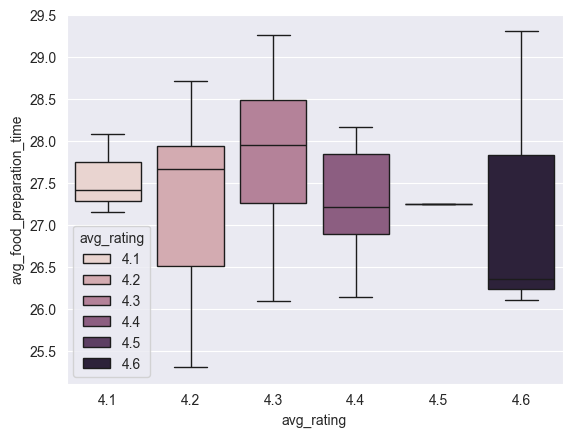

In [163]:
# Restaurants with low food prep times are more likely to have high ratings.
sns.boxplot(data=df_stats_by_restaurant, x='avg_rating', y='avg_food_preparation_time', hue='avg_rating');

#### Observations:
* The cuisines with the top ratings are Spanish, Indian, Thai, Mexican, Southern
* Restaurants with fast food prep time are more likely to have high ratings.
* Restaurants with low costs are more likely to have high ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

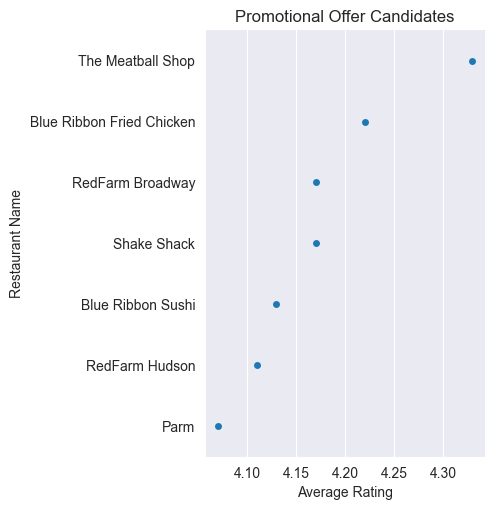

In [164]:
# Write the code here
df_promotional_offer = (
    df_clean.groupby('restaurant_name')
    .agg(avg_rating=('rating', 'mean'), rating_count=('rating', 'count'))
    .query('avg_rating > 4 and rating_count > 50')
    .sort_values(by='avg_rating', ascending=False)
)
df_promotional_offer.avg_rating = df_promotional_offer.avg_rating.round(2)
sns.catplot(data=df_promotional_offer, x='avg_rating', y='restaurant_name')
plt.title('Promotional Offer Candidates')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name');

#### Observations:

There are 7 restaurants who would qualify for this promotion the top 4 are the following.
* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* RedFarm Broadway


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [165]:
 # Write the code here
df_net_revenue = df_clean.copy()
df_net_revenue["revenue"] = \
    (df_net_revenue.apply
     (lambda row: row["cost_of_the_order"] *
                  (.25
                   if row["cost_of_the_order"] > 20
                     else .15
if row["cost_of_the_order"] > 5
                  else 0), axis=1))
df_net_revenue["revenue"] = df_net_revenue["revenue"].round(2)
print(f'Total Revenue: ${df_net_revenue["revenue"].sum():.2f}')
df_net_revenue.head()

Total Revenue: $6166.40


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


#### Observations:
The total revenue for this company is $6166.40

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [166]:
# Write the code here
df_long_delivery = df_clean.copy()
df_long_delivery['total_time'] = df_long_delivery['food_preparation_time']+df_long_delivery['delivery_time']
df_long_delivery = df_long_delivery[df_long_delivery['total_time'] > 60]
num_total_orders = df_clean.shape[0]
num_long_delivery = df_long_delivery.shape[0]
df_long_delivery.head()

print(f'{num_long_delivery/num_total_orders:.2%} orders take more than 60 minutes to get delivered')


10.54% orders take more than 60 minutes to get delivered


#### Observations:
10.54% orders take more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

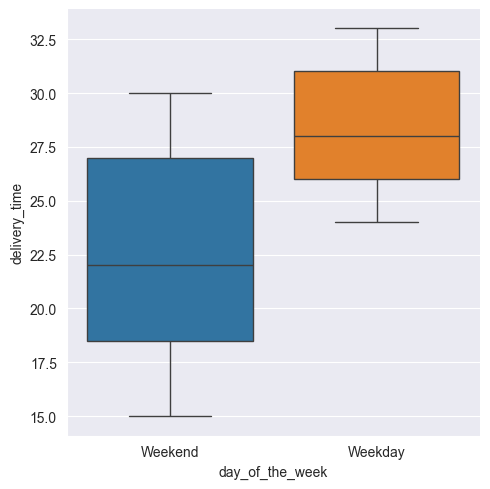

In [167]:
# Write the code here
sns.catplot(data=df_clean, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', kind='box');

#### Observations:
The mean delivery time on Weekends is 22.5 minutes while the mean delivery time on weekdays is 27.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The strongest correlation I found was between cuisine type and rating.
* The cuisines with the top ratings are Spanish, Indian, Thai, Mexican, Southern
* There is a slight correlation between food price and rating along with food prep time and rating.

#### Charts and Graphs

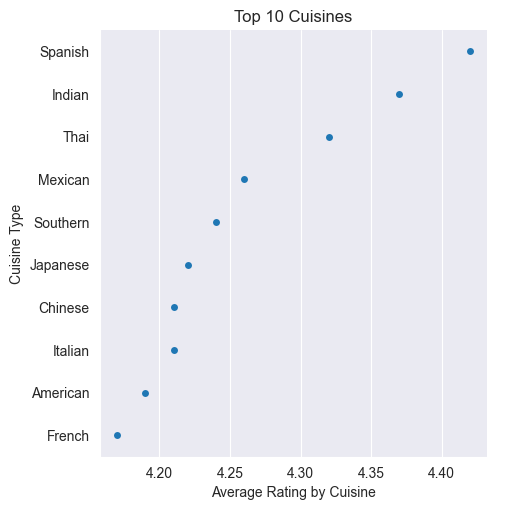

In [168]:
# Top Cuisines
top_cuisines = df_mean_rating_by_cuisine[:10].copy()
top_cuisines["avg_rating_by_cuisine"]=top_cuisines["rating"].round(2)
top_cuisines.drop(columns=["rating"], inplace=True)
sns.catplot(data=top_cuisines,  x='avg_rating_by_cuisine', y=top_cuisines.index)
plt.xlabel('Average Rating by Cuisine')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines');

#### Top 5 Restaurants Over All

In [169]:
# Top 5 restaurants over all
df_stats_by_restaurant.head()

,avg_rating,avg_cost_of_the_order,avg_food_preparation_time
restaurant_name,,,
Sushi of Gari Tribeca,4.6,14.98,29.31
Blue Ribbon Sushi Bar & Grill,4.6,14.25,26.36
Five Guys Burgers and Fries,4.6,18.60,26.11
The Meatball Shop,4.5,17.81,27.25
Han Dynasty,4.4,14.13,28.04


#### Top 10 Cuisines

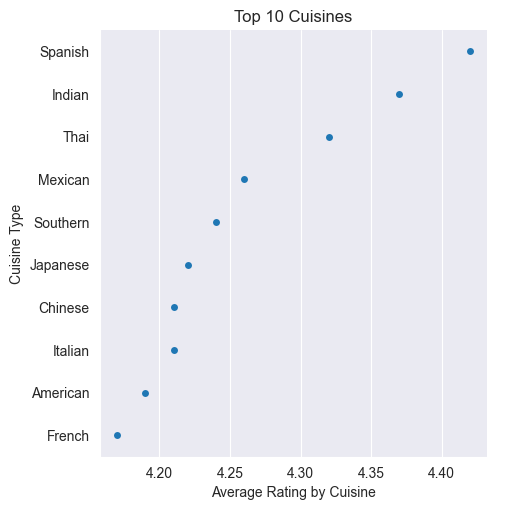

In [170]:
# Top Cuisines
top_cuisines = df_mean_rating_by_cuisine[:10].copy()
top_cuisines["avg_rating_by_cuisine"]=top_cuisines["rating"].round(2)
top_cuisines.drop(columns=["rating"], inplace=True)
sns.catplot(data=top_cuisines,  x='avg_rating_by_cuisine', y=top_cuisines.index)
plt.xlabel('Average Rating by Cuisine')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines');

### Recommendations:

* Make sure users can easily search for restaurants by food price and cuisine type.
* Every week pick different cuisine of the week from the list of the top 10 cuisines and offer discounts for those restaurants. This will incentivise people to try out restaurants they wouldn't otherwise try and will encourage them to engage with the app since it's a limited time offer.